In [14]:


import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from PIL import Image
from prettytable import PrettyTable
import warnings
import random
import csv
warnings.filterwarnings("ignore")

In [15]:
# model = "Trained_on_AWIB_FairFace_balanced"
model = "Trained_on_FairFace_Testing"

save_path = F"Z://RR/Final/report_work/results/{model}/UTKFace_tests"
df_path = F"Z://RR/Final/report_work/results/{model}/UTKFace_tests/UTKFace_results.csv"

UTKFace_df = pd.read_csv(df_path)
single_mode = True

if not single_mode:
    save_path = F"Z://RR/Final/report_work/results/{model}/UTKFace_tests_comparitive"


In [16]:
UTKFace_df.head()

Unnamed: 0                                               file  age  gender  \
0           0  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       0   
1           1  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       0   
2           2  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   
3           3  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   
4           4  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   

  ethnicity     age_group new_ethnicity  prediction pred_age_group  true  
0     white  more_than_70         white           8   more_than_70     8  
1     white  more_than_70         white           8   more_than_70     8  
2     white  more_than_70         white           8   more_than_70     8  
3     white  more_than_70         white           8   more_than_70     8  
4     white  more_than_70         white           8   more_than_70     8

In [17]:

def write_results(true,predicted,folder,field):
	
	accuracy = metrics.accuracy_score(true,predicted)
	balanced_accuracy = metrics.balanced_accuracy_score(true,predicted)
 
##########################################################---Accuracy---######################################################################
	
	precision_macro = metrics.precision_score(true,predicted,average='macro')
	precision_micro = metrics.precision_score(true,predicted,average='micro')
	precision_weighted = metrics.precision_score(true,predicted,average='weighted')
 
##########################################################---Precision--######################################################################
	
	recall_macro = metrics.recall_score(true,predicted,average='macro')
	recall_micro = metrics.recall_score(true,predicted,average='micro')
	recall_weighted = metrics.recall_score(true,predicted,average='weighted')
 
##########################################################---Recall--######################################################################
 
	f1_macro = metrics.f1_score(true,predicted,average='macro')
	f1_micro = metrics.f1_score(true,predicted,average='micro')
	f1_weighted = metrics.f1_score(true,predicted,average='weighted')
 
##########################################################---F1 Score---######################################################################

	cohen_kappa = metrics.cohen_kappa_score(true,predicted)
	matt_corr = metrics.matthews_corrcoef(true,predicted)
 

	field_names = ['Metric', 'Result']
	
	# with open(os.path.expanduser(csv_results_output_path),'a') as csvfile:
	# 	writer = csv.DictWriter(csvfile, fieldnames=field_names)
	
	# 	writer.writerow({'Metric':F"accuracy {field}",'Result':accuracy})
	# 	writer.writerow({'Metric':F"balanced_accuracy {field}",'Result':balanced_accuracy})
  
	# 	writer.writerow({'Metric':F"precision_macro {field}",'Result':precision_macro})
	# 	writer.writerow({'Metric':F"precision_micro {field}",'Result':precision_micro})
	# 	writer.writerow({'Metric':F"precision_weighted {field}",'Result':precision_weighted})
  
	# 	writer.writerow({'Metric':F"recall_macro {field}",'Result':recall_macro})
	# 	writer.writerow({'Metric':F"recall_micro {field}",'Result':recall_micro})
	# 	writer.writerow({'Metric':F"recall_weighted {field}",'Result':recall_weighted})
  
	# 	writer.writerow({'Metric':F"f1_macro {field}",'Result':f1_macro})
	# 	writer.writerow({'Metric':F"f1_micro {field}",'Result':f1_micro})
	# 	writer.writerow({'Metric':F"f1_weighted {field}",'Result':f1_weighted})
  
	# 	writer.writerow({'Metric':F"cohen_kappa {field}",'Result':cohen_kappa})

  
##########################################################---Writing to CSV File--######################################################################
  
  
	table = PrettyTable()
	table.field_names = field_names
 
	table.add_row([F"{field} accuracy",accuracy])
	table.add_row([F"{field} balanced_accuracy",balanced_accuracy])
	table.add_row(['_'*26,'_'*26])
 
	table.add_row([F"{field} precision_macro",precision_macro])
	table.add_row([F"{field} precision_weighted",precision_weighted])
	table.add_row(['_'*26,'_'*26])
 
	table.add_row([F"{field} recall_macro",recall_macro])
	table.add_row([F"{field} recall_weighted",recall_weighted])
	table.add_row(['_'*26,'_'*26])
 
	table.add_row([F"{field} f1_macro",f1_macro])
	table.add_row([F"{field} f1_weighted",f1_weighted])
	table.add_row(['_'*26,'_'*26])
 
	table.add_row([F"{field} cohen_kappa",cohen_kappa])
	table.add_row([F"{field} matthews corrcoef",matt_corr])
 
	
	for f in field_names:
		table.align[f] = "l"
 
 
	# print(F"Results for {field}\n",table)
	string_table = table.get_string();
	if not os.path.exists(os.path.join(save_path,folder)):
		os.mkdir(os.path.join(save_path,folder))
	full_save_path = os.path.join(os.path.join(save_path,folder),F"{field}.txt")
	txt_file = open(full_save_path,'w+')
	txt_file.write(string_table)
	txt_file.close()
	
	full_save_path = os.path.join(os.path.join(save_path,folder),F"{field}.csv")
 
	with open(full_save_path, 'w',newline='') as f_output:
		writer = csv.DictWriter(f_output, fieldnames=field_names)
  
		for i,row in enumerate(table):
			row_dict = {}
			row.border = False
			row.header = False
			for f in field_names:
				temp = row.get_string(fields = [f]).strip()
				if temp[0] != '_':
				
					# f_output.write({f:temp})
					row_dict[f] = temp
			if len(row_dict) > 0:
				writer.writerow(row_dict)
 
##########################################################---Displaying table of data--######################################################################
 

In [18]:

def file_results_set(folder,heading,file_name,predictions_arr):
	table = PrettyTable()
	heading.insert(0,'Metric')
	# table.field_names = heading
 
	table.add_column('Metric',['accuracy','balanced_accuracy','precision_macro','precision_weighted','recall_macro','recall_weighted','f1_macro','f1_weighted','cohen_kappa','matt_corr'])
	
	for item in predictions_arr:
		true = item[0]
		predicted = item[1]
		name = item[2]
		rounding_pos = 3
  
		accuracy = round(metrics.accuracy_score(true,predicted),rounding_pos)

		balanced_accuracy = round(metrics.balanced_accuracy_score(true,predicted),rounding_pos)
	
	##########################################################---Accuracy---######################################################################
		
		precision_macro = round(metrics.precision_score(true,predicted,average='macro'),rounding_pos)
		precision_weighted = round(metrics.precision_score(true,predicted,average='weighted'),rounding_pos)
	
	##########################################################---Precision--######################################################################
		
		recall_macro = round(metrics.recall_score(true,predicted,average='macro'),rounding_pos)
		recall_weighted = round(metrics.recall_score(true,predicted,average='weighted'),rounding_pos)
	
	##########################################################---Recall--######################################################################
	
		f1_macro = round(metrics.f1_score(true,predicted,average='macro'),rounding_pos)
		f1_weighted = round(metrics.f1_score(true,predicted,average='weighted'),rounding_pos)
	
	##########################################################---F1 Score---######################################################################

		cohen_kappa = round(metrics.cohen_kappa_score(true,predicted),rounding_pos)
		matt_corr = round(metrics.matthews_corrcoef(true,predicted),rounding_pos)

		table.add_column(name,[accuracy,balanced_accuracy,precision_macro,precision_weighted,recall_macro,recall_weighted,f1_macro,f1_weighted,cohen_kappa,matt_corr])

	for f in heading:
		table.align[f] = "l"
	
	string_table = table.get_string();
	if not os.path.exists(os.path.join(save_path,folder)):
		os.mkdir(os.path.join(save_path,folder))
  
	full_save_path = os.path.join(os.path.join(save_path,folder),F"{file_name}.txt")
	txt_file = open(full_save_path,'w+')
	txt_file.write(string_table)
	txt_file.close()
	
	full_save_path = os.path.join(os.path.join(save_path,folder),F"{file_name}.csv")
 
	with open(full_save_path, 'w',newline='') as f_output:
		writer = csv.DictWriter(f_output, fieldnames=table.field_names)
		row_dict = {}
  
		for f in table.field_names:
			row_dict[f] = f
   
		writer.writerow(row_dict)

		for i,row in enumerate(table):
			row_dict = {}
			row.border = False
			row.header = False
			for f in table.field_names:
				temp = row.get_string(fields = [f]).strip()
				if temp[0] != '_':
				
					# f_output.write({f:temp})
					row_dict[f] = temp
			if len(row_dict) > 0:
				writer.writerow(row_dict)
 

In [19]:
overall_true,overall_predicted = UTKFace_df['true'],UTKFace_df['prediction']
if single_mode: write_results(overall_true,overall_predicted,"Overall","Overall")

In [20]:
predictions_arr = []
predictions_arr.append((overall_true,overall_predicted,'Overall'))

ethnicities = UTKFace_df.ethnicity.value_counts().reset_index(name = "count")['index']

for eth in ethnicities:
	eth_df = UTKFace_df[UTKFace_df['ethnicity'] == eth]
	true,predicted = eth_df['true'],eth_df['prediction']
	predictions_arr.append((true,predicted,eth))
	if single_mode: write_results(true,predicted,'Ethnicity',eth)
 
if not single_mode: file_results_set('Ethnicity',ethnicities.to_list(),'Ethnicity',predictions_arr)


In [21]:
predictions_arr = []
predictions_arr.append((overall_true,overall_predicted,'Overall'))

age_groups = UTKFace_df.age_group.value_counts().reset_index(name = "count")['index'].sort_values().reset_index(drop=True)

for ag in age_groups:
	age_df = UTKFace_df[UTKFace_df['age_group'] == ag]
	true,predicted = age_df['true'],age_df['prediction']
	predictions_arr.append((true,predicted,ag))
 
	if single_mode: write_results(true,predicted,'Age',ag)
 
if not single_mode: file_results_set('Age',age_groups.to_list(),'Age',predictions_arr)


In [22]:
UTKFace_df.head()

Unnamed: 0                                               file  age  gender  \
0           0  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       0   
1           1  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       0   
2           2  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   
3           3  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   
4           4  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   

  ethnicity     age_group new_ethnicity  prediction pred_age_group  true  
0     white  more_than_70         white           8   more_than_70     8  
1     white  more_than_70         white           8   more_than_70     8  
2     white  more_than_70         white           8   more_than_70     8  
3     white  more_than_70         white           8   more_than_70     8  
4     white  more_than_70         white           8   more_than_70     8

In [23]:
predictions_arr = []
predictions_arr.append((overall_true,overall_predicted,'Overall'))

for g in [0,1]: #0 is Male, 1 is Female
	gender_df = UTKFace_df[UTKFace_df['gender'] == g]
	true,predicted = gender_df['true'],gender_df['prediction']
	if single_mode: 
		write_results(true,predicted,'Gender','Male') if g == 0 else write_results(true,predicted,'Gender','Female') 
	
	predictions_arr.append((true,predicted,'Male')) if g == 0 else predictions_arr.append((true,predicted,'Female'))
# print(predictions_arr)
if not single_mode: file_results_set(F'Gender',['Male','Female'],F'Gender',predictions_arr)

	

In [24]:
for eth in ethnicities:
	predictions_arr = []
	predictions_arr.append((overall_true,overall_predicted,'Overall'))
	for ag in age_groups:
		temp_df = UTKFace_df[(UTKFace_df['ethnicity'] == eth) & (UTKFace_df['age_group'] == ag)]
		true,predicted = temp_df['true'],temp_df['prediction']
		if single_mode:  write_results(true,predicted,'Ethncity Age',F'{eth} {ag}')
		
		predictions_arr.append((true,predicted,ag))
  
	if not single_mode: file_results_set(F'Ethnicity Age',age_groups.to_list(),F'Eth Age {eth}',predictions_arr)


In [25]:


for eth in ethnicities:
	predictions_arr = []
	predictions_arr.append((overall_true,overall_predicted,'Overall'))
	for g in [0,1]: #0 is Male, 1 is Female
		temp_df = UTKFace_df[(UTKFace_df['ethnicity'] == eth) & (UTKFace_df['gender'] == g)]
		true,predicted = temp_df['true'],temp_df['prediction']
		if single_mode: write_results(true,predicted,'Ethncity Gender',F'{eth} Male') if g == 0 else write_results(true,predicted,'Ethncity Gender',F'{eth} Female') 

		predictions_arr.append((true,predicted,'Male')) if g == 0 else predictions_arr.append((true,predicted,'Female'))
	if not single_mode: file_results_set(F'Ethnicity Gender',['Male','Female'],F'Eth Gender {eth}',predictions_arr)


In [26]:

for eth in ethnicities:
	predictions_arr = []
	predictions_arr.append((overall_true,overall_predicted,'Overall'))

	for ag in age_groups:
		for g in [0,1]: #0 is Male, 1 is Female
			temp_df = UTKFace_df[(UTKFace_df['ethnicity'] == eth) & (UTKFace_df['gender'] == g) & (UTKFace_df['age_group'] == ag)]
			true,predicted = temp_df['true'],temp_df['prediction']
			if single_mode: write_results(true,predicted,'Ethncity Age Gender',F'{eth} {ag} Male') if g == 0 else write_results(true,predicted,'Ethncity Age Gender',F'{eth} {ag} Female') 
			predictions_arr.append((true,predicted,'Male')) if g == 0 else predictions_arr.append((true,predicted,'Female'))
   
		if not single_mode: file_results_set(F'Ethnicity Age Gender',['Male','Female'],F'Eth Age {ag} Gender {eth}',predictions_arr)


ValueError: Field names must be unique

Shwoing some of the predictions.

In [ ]:
UTKFace_df.head()

Unnamed: 0                                               file  age  gender  \
0           0  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       0   
1           1  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       0   
2           2  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   
3           3  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   
4           4  Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...  100       1   

  ethnicity     age_group new_ethnicity  prediction pred_age_group  true  
0     white  more_than_70         white         8.0   more_than_70     8  
1     white  more_than_70         white         8.0   more_than_70     8  
2     white  more_than_70         white         8.0   more_than_70     8  
3     white  more_than_70         white         8.0   more_than_70     8  
4     white  more_than_70         white         8.0   more_than_70     8

In [ ]:
def show_image(file_path):
	# full_path = file_prefix + '/'+file_path
	img = cv2.imread(file_path)[:,:,::-1]
	plt.imshow(img)
	plt.show()

6461 20-29 20-29


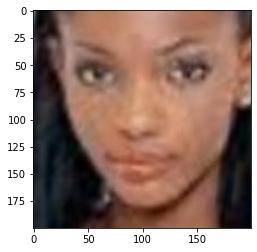

10914 30-39 20-29


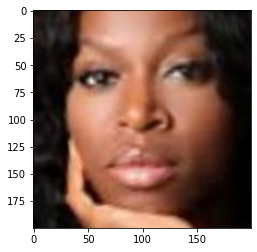

21593 03-09 10-19


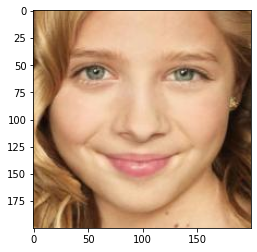

19219 60-69 50-59


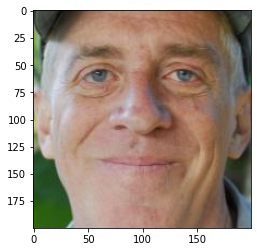

7213 20-29 20-29


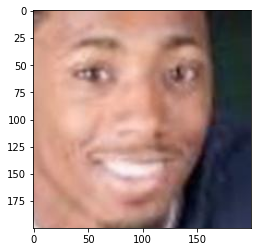

16173 03-09 03-09


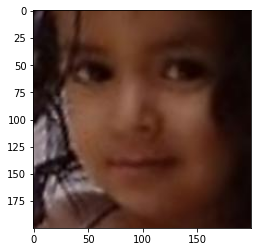

7058 20-29 20-29


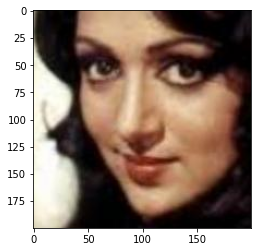

11663 30-39 30-39


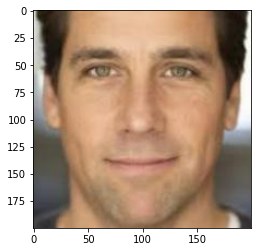

21335 more_than_70 more_than_70


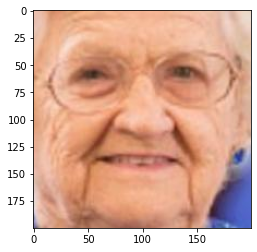

11229 30-39 30-39


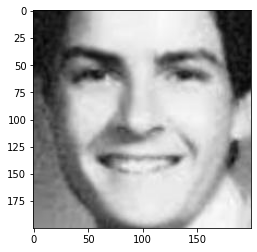

4575 20-29 20-29


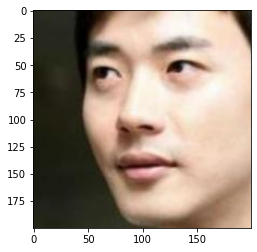

1582 0-02 0-02


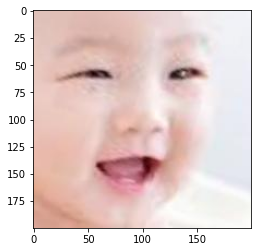

16943 50-59 50-59


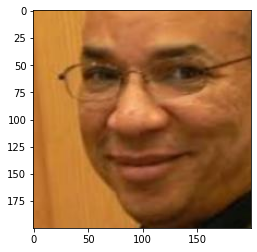

12525 30-39 30-39


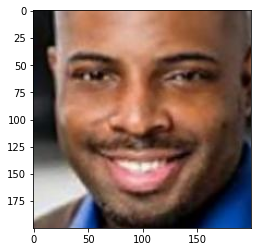

2166 0-02 0-02


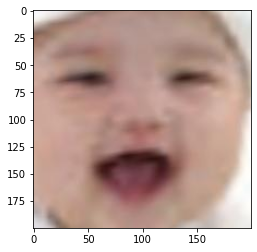

12282 30-39 20-29


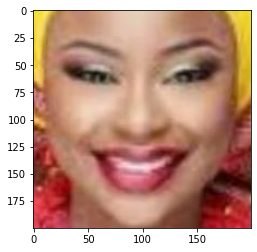

20861 03-09 03-09


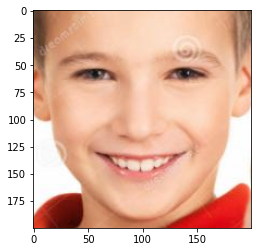

2642 20-29 10-19


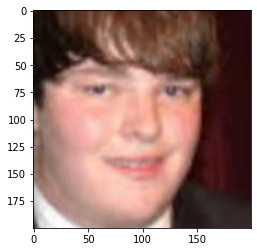

2754 20-29 20-29


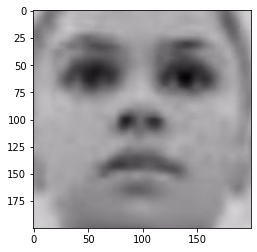

2884 20-29 20-29


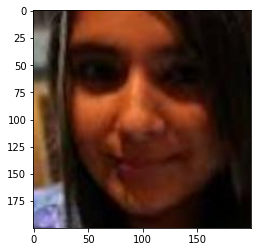

20717 more_than_70 60-69


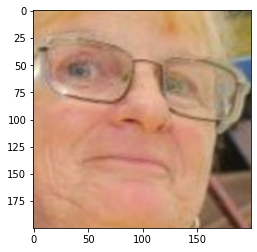

9910 30-39 20-29


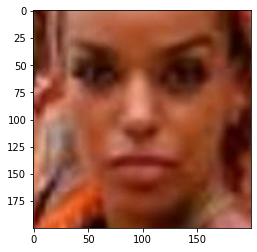

18325 50-59 50-59


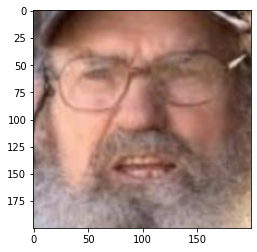

2863 20-29 20-29


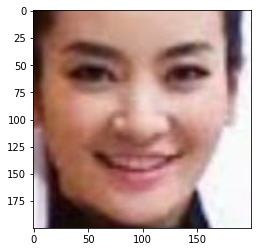

13320 30-39 30-39


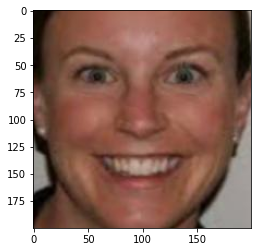

21290 more_than_70 more_than_70


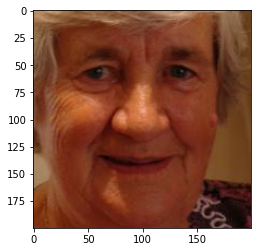

11885 30-39 20-29


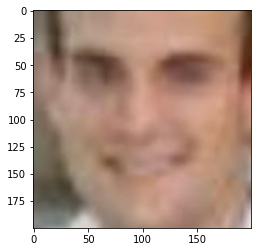

5008 20-29 20-29


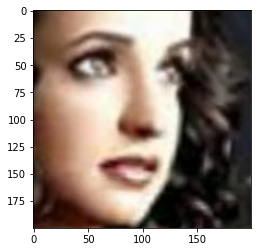

6282 20-29 20-29


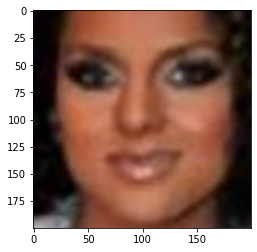

11141 30-39 40-49


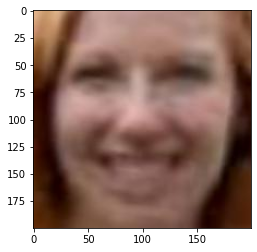

5373 20-29 20-29


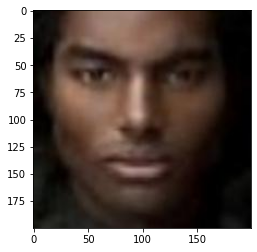

20324 more_than_70 more_than_70


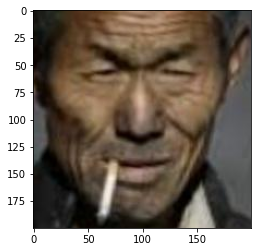

10572 30-39 30-39


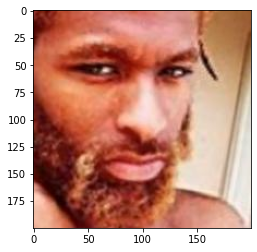

20590 more_than_70 50-59


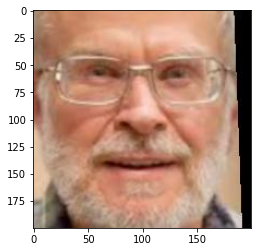

18047 50-59 30-39


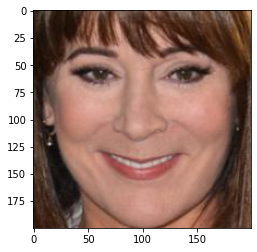

19288 60-69 50-59


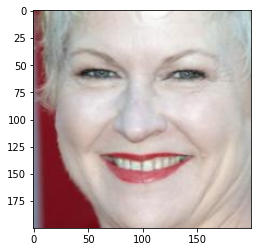

5439 20-29 20-29


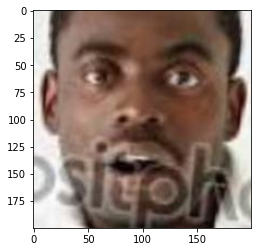

1785 0-02 0-02


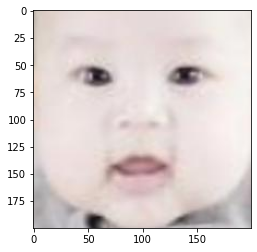

1547 0-02 0-02


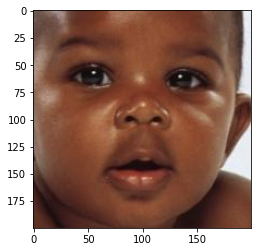

2285 0-02 0-02


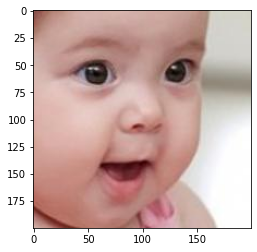

1860 0-02 03-09


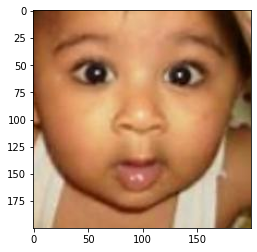

16678 50-59 50-59


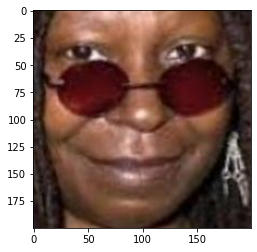

317 10-19 10-19


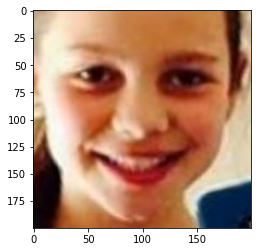

9378 03-09 03-09


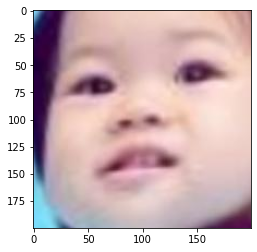

15673 40-49 40-49


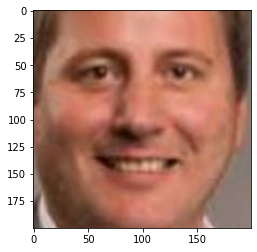

2040 0-02 03-09


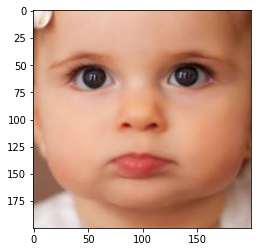

513 10-19 10-19


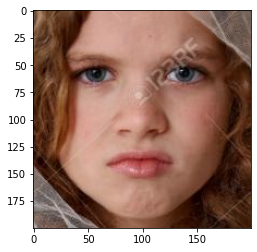

14924 40-49 40-49


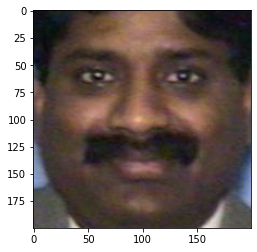

2875 20-29 20-29


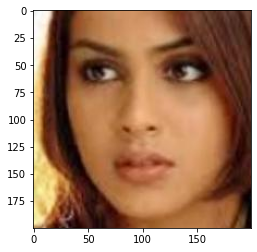

14608 40-49 30-39


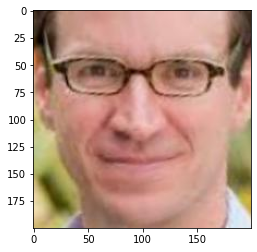

In [ ]:
for i in range(50):
	index = random.randint(0,len(UTKFace_df))

	record = UTKFace_df.iloc[index]
	print(index,record.age_group,record.pred_age_group)
	show_image(record.file)
	plt.show()
	

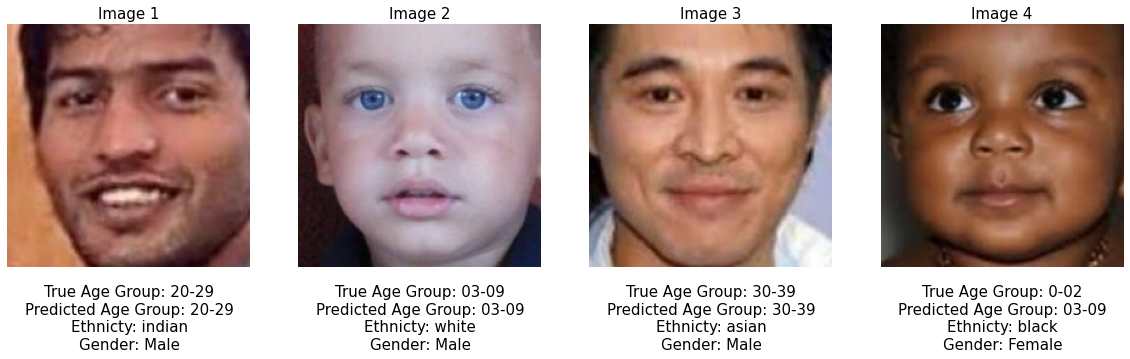

In [ ]:
image_idx = [5747,13739,12979,2124]

fig = plt.figure(figsize=(20, 10),facecolor = 'white')

genders = ['Male','Female']
rows = 1
columns = 4
for i,idx in enumerate(image_idx):
	record = UTKFace_df.iloc[idx]
	fig.add_subplot(rows, columns, i+1)
	path = record.file
 
	img = cv2.imread(path)[:,:,::-1]
	plt.imshow(img)
	plt.axis('off')
	plt.title("Image {}".format(i+1),color = 'black',fontsize=15)
	caption = F"True Age Group: {record.age_group}\nPredicted Age Group: {record.pred_age_group}\nEthnicty: {record.ethnicity}\nGender: {genders[record.gender]}"
	plt.text(100, 265, caption, wrap=True, horizontalalignment='center',backgroundcolor = 'white',fontsize=15)

plt.savefig(os.path.join(save_path,'correct_images.jpg'))

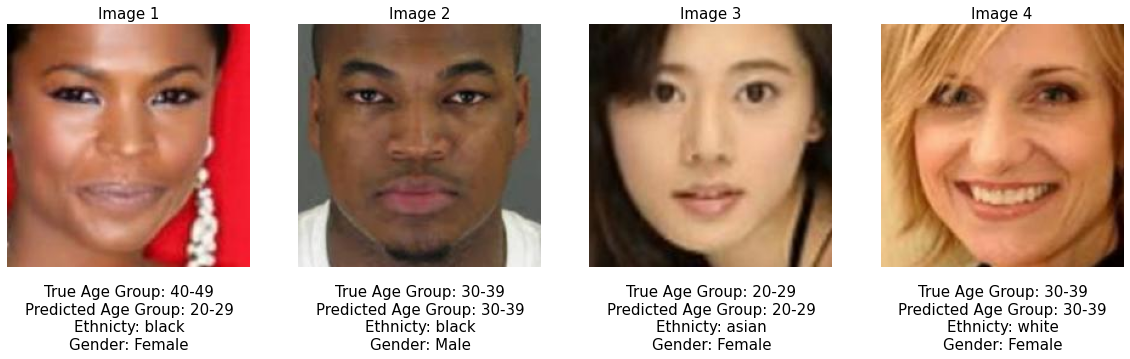

In [ ]:
image_idx = [14393,11862,8385,10778]

fig = plt.figure(figsize=(20, 10),facecolor = 'white')

genders = ['Male','Female']
rows = 1
columns = 4
for i,idx in enumerate(image_idx):
	record = UTKFace_df.iloc[idx]
	fig.add_subplot(rows, columns, i+1)
	path = record.file
 
	img = cv2.imread(path)[:,:,::-1]
	plt.imshow(img)
	plt.axis('off')
	plt.title("Image {}".format(i+1),color = 'black',fontsize=15)
	caption = F"True Age Group: {record.age_group}\nPredicted Age Group: {record.pred_age_group}\nEthnicty: {record.ethnicity}\nGender: {genders[record.gender]}"
	plt.text(100, 265, caption, wrap=True, horizontalalignment='center',backgroundcolor = 'white',fontsize=15)

plt.savefig(os.path.join(save_path,'incorrect_images.jpg'))